In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)
import matplotlib.lines as lines
import matplotlib.patches as mpatches
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as lines
sns.set_style('white')
import matplotlib
# matplotlib.use('Agg')


cd /public/home/wangwei/guwenbin/Contact_model001/Copy/executable_file
for in in {1..10}; do sbatch simulation26b.sh  ;done
squeue

In [13]:
colo = ['prevalence','N', 'GCC','GSP','GIP','avd_G','avd_I','avd_S','dim_G','dim_S','dim_I',\
        'k_G', 'k_S', 'k_I','Gc_G', 'Gc_S', 'Gc_I'\
        ,'alpha',	'threshold_',	'mobility','sign','seed','id','scope']
# df25 = pd.read_csv("data\\result25.csv",header=None,names = colo)
df25 = pd.read_csv("data\\result25.csv",header=None,names = colo)
# df25['seed'].value_counts()
# dft1 = df25.loc[df25['seed']==0.99,:].groupby(by = 'id').mean()
# dft9 = df25.loc[df25['seed']==0.99,:].groupby(by = 'id').mean()

2.0    301
Name: alpha, dtype: int64
0.3    301
Name: mobility, dtype: int64


<Axes: >

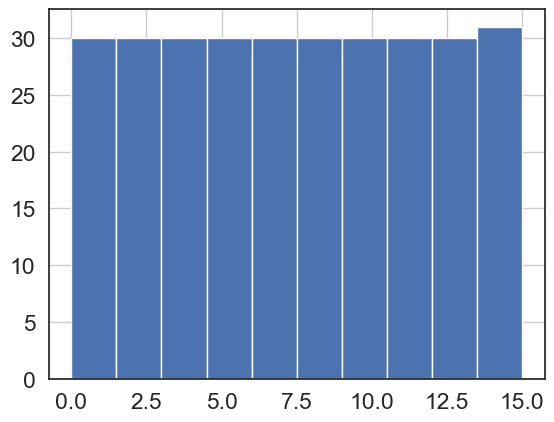

In [14]:
temp  = df25.loc[(df25['seed']==0.99)&(df25['sign']==1),:].groupby(by = 'id').mean()
print(temp['alpha'].value_counts())
print(temp['mobility'].value_counts())
temp['threshold_'].hist()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


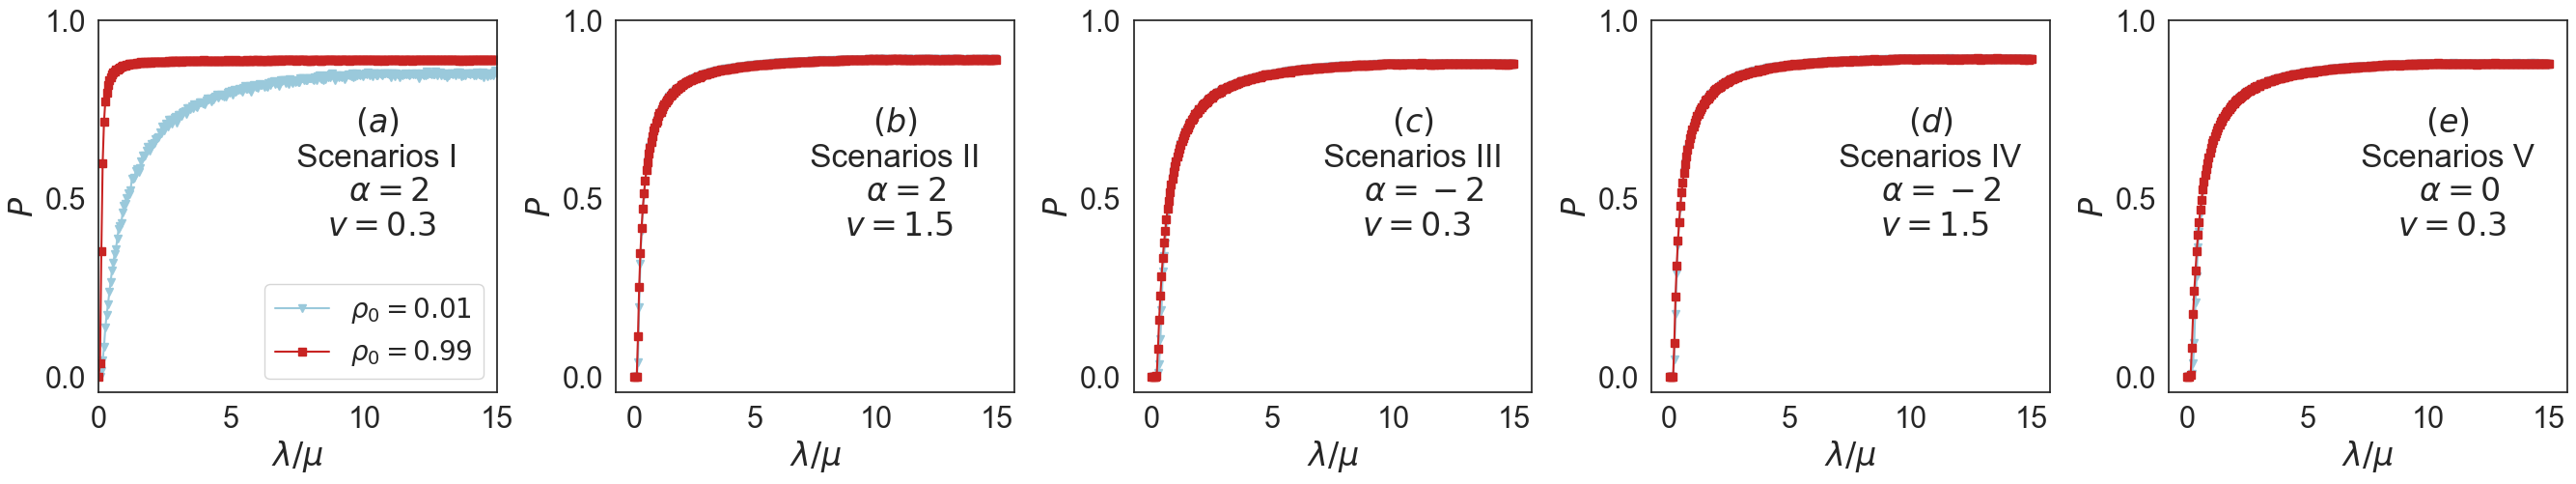

In [26]:
# Fig1 drawing
df25 = pd.read_csv("data\\result25.csv",header=None,names = colo)
df25['seed'].value_counts()
dft1 = df25.loc[df25['seed']==0.01,:].groupby(by = 'id').mean()
dft9 = df25.loc[df25['seed']==0.99,:].groupby(by = 'id').mean()

params={'font.family':'sans-serif',
        'font.serif':'Microsoft Sans Serif',
        'font.style':'normal',
        'font.weight':'normal', #or 'blod'
        }
# rcParams.update(params)

para = [[2, 0.3, 1], [2, 1.5, 2], [-2, 0.3, 3], [-2, 1.5, 4], [0, 0.3, 5]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2 ='alpha', 'mobility','threshold_','prevalence'
names = locals()
count = 1
for i,j,k in para:
        # names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        # names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        names['s1data' + str(count) ] = df25.loc[(df25['seed']==0.01)&(df25['sign']==k),:].groupby(by = 'id').mean()
        names['s9data' + str(count) ] = df25.loc[(df25['seed']==0.99)&(df25['sign']==k),:].groupby(by = 'id').mean()
        count += 1

fig,axes = plt.subplots(1,5,figsize = (33,5),dpi = 100,sharey = False)
plt.subplots_adjust(wspace=0.3)
for ax,data01,data09 in zip(axes.ravel(),[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
        # ax.plot(data01[var1],data01[var2],'v-',c = '#2878b5',label = '$\\rho_0$ = 0.01')
        # ax.plot(data09[var1],data09[var2],'s-',c = '#f8ac8c',label = '$\\rho_0$ = 0.99')
        ax.plot(data01[var1],data01[var2],'v-',c = '#9ac9db',markersize = 6,label = '$\\rho_0 = 0.01$')
        ax.plot(data09[var1],data09[var2],'s-',c = '#c82423',markersize = 6,label = '$\\rho_0 = 0.99$')

# 绘制标准曲线
# axes[4].plot(data09[var1],data09[var2]*(np.pi/(30^2)),'-',linewidth = 4,c = 'k')

axes[0].legend(loc = 4,fontsize = 20)

for ax,title,scene,[a,v,_] in zip(axes.ravel(),[f'$({i})$' for i in 'abcde'] ,["I","II","III","IV","V"],para):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 24)
    ax.set_ylabel('$P$',fontsize = 24,)
    ax.set_yticks([0.0,0.5,1.0],[0.0,0.5,1.0])
#     ax.set_xticks([0.0,0.5,1.0,1.5,2.0])
    ax.tick_params( labelsize=22 )
    ax.set_title(title+ (f'\n Scenarios {scene} \n   $\\alpha = {a}$ \n $v = {v}$'),horizontalalignment='center',
                 loc = 'left',y = 0.4,x = 0.7,fontsize = 24)    
axes[0].set_xlim(0,15)

plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo\\002.eps',format='eps',bbox_inches = 'tight',dpi = 300)
plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo-red\\002.eps',format='eps',bbox_inches = 'tight',dpi = 300)
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\图片\\002.jpg',dpi = 300,bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


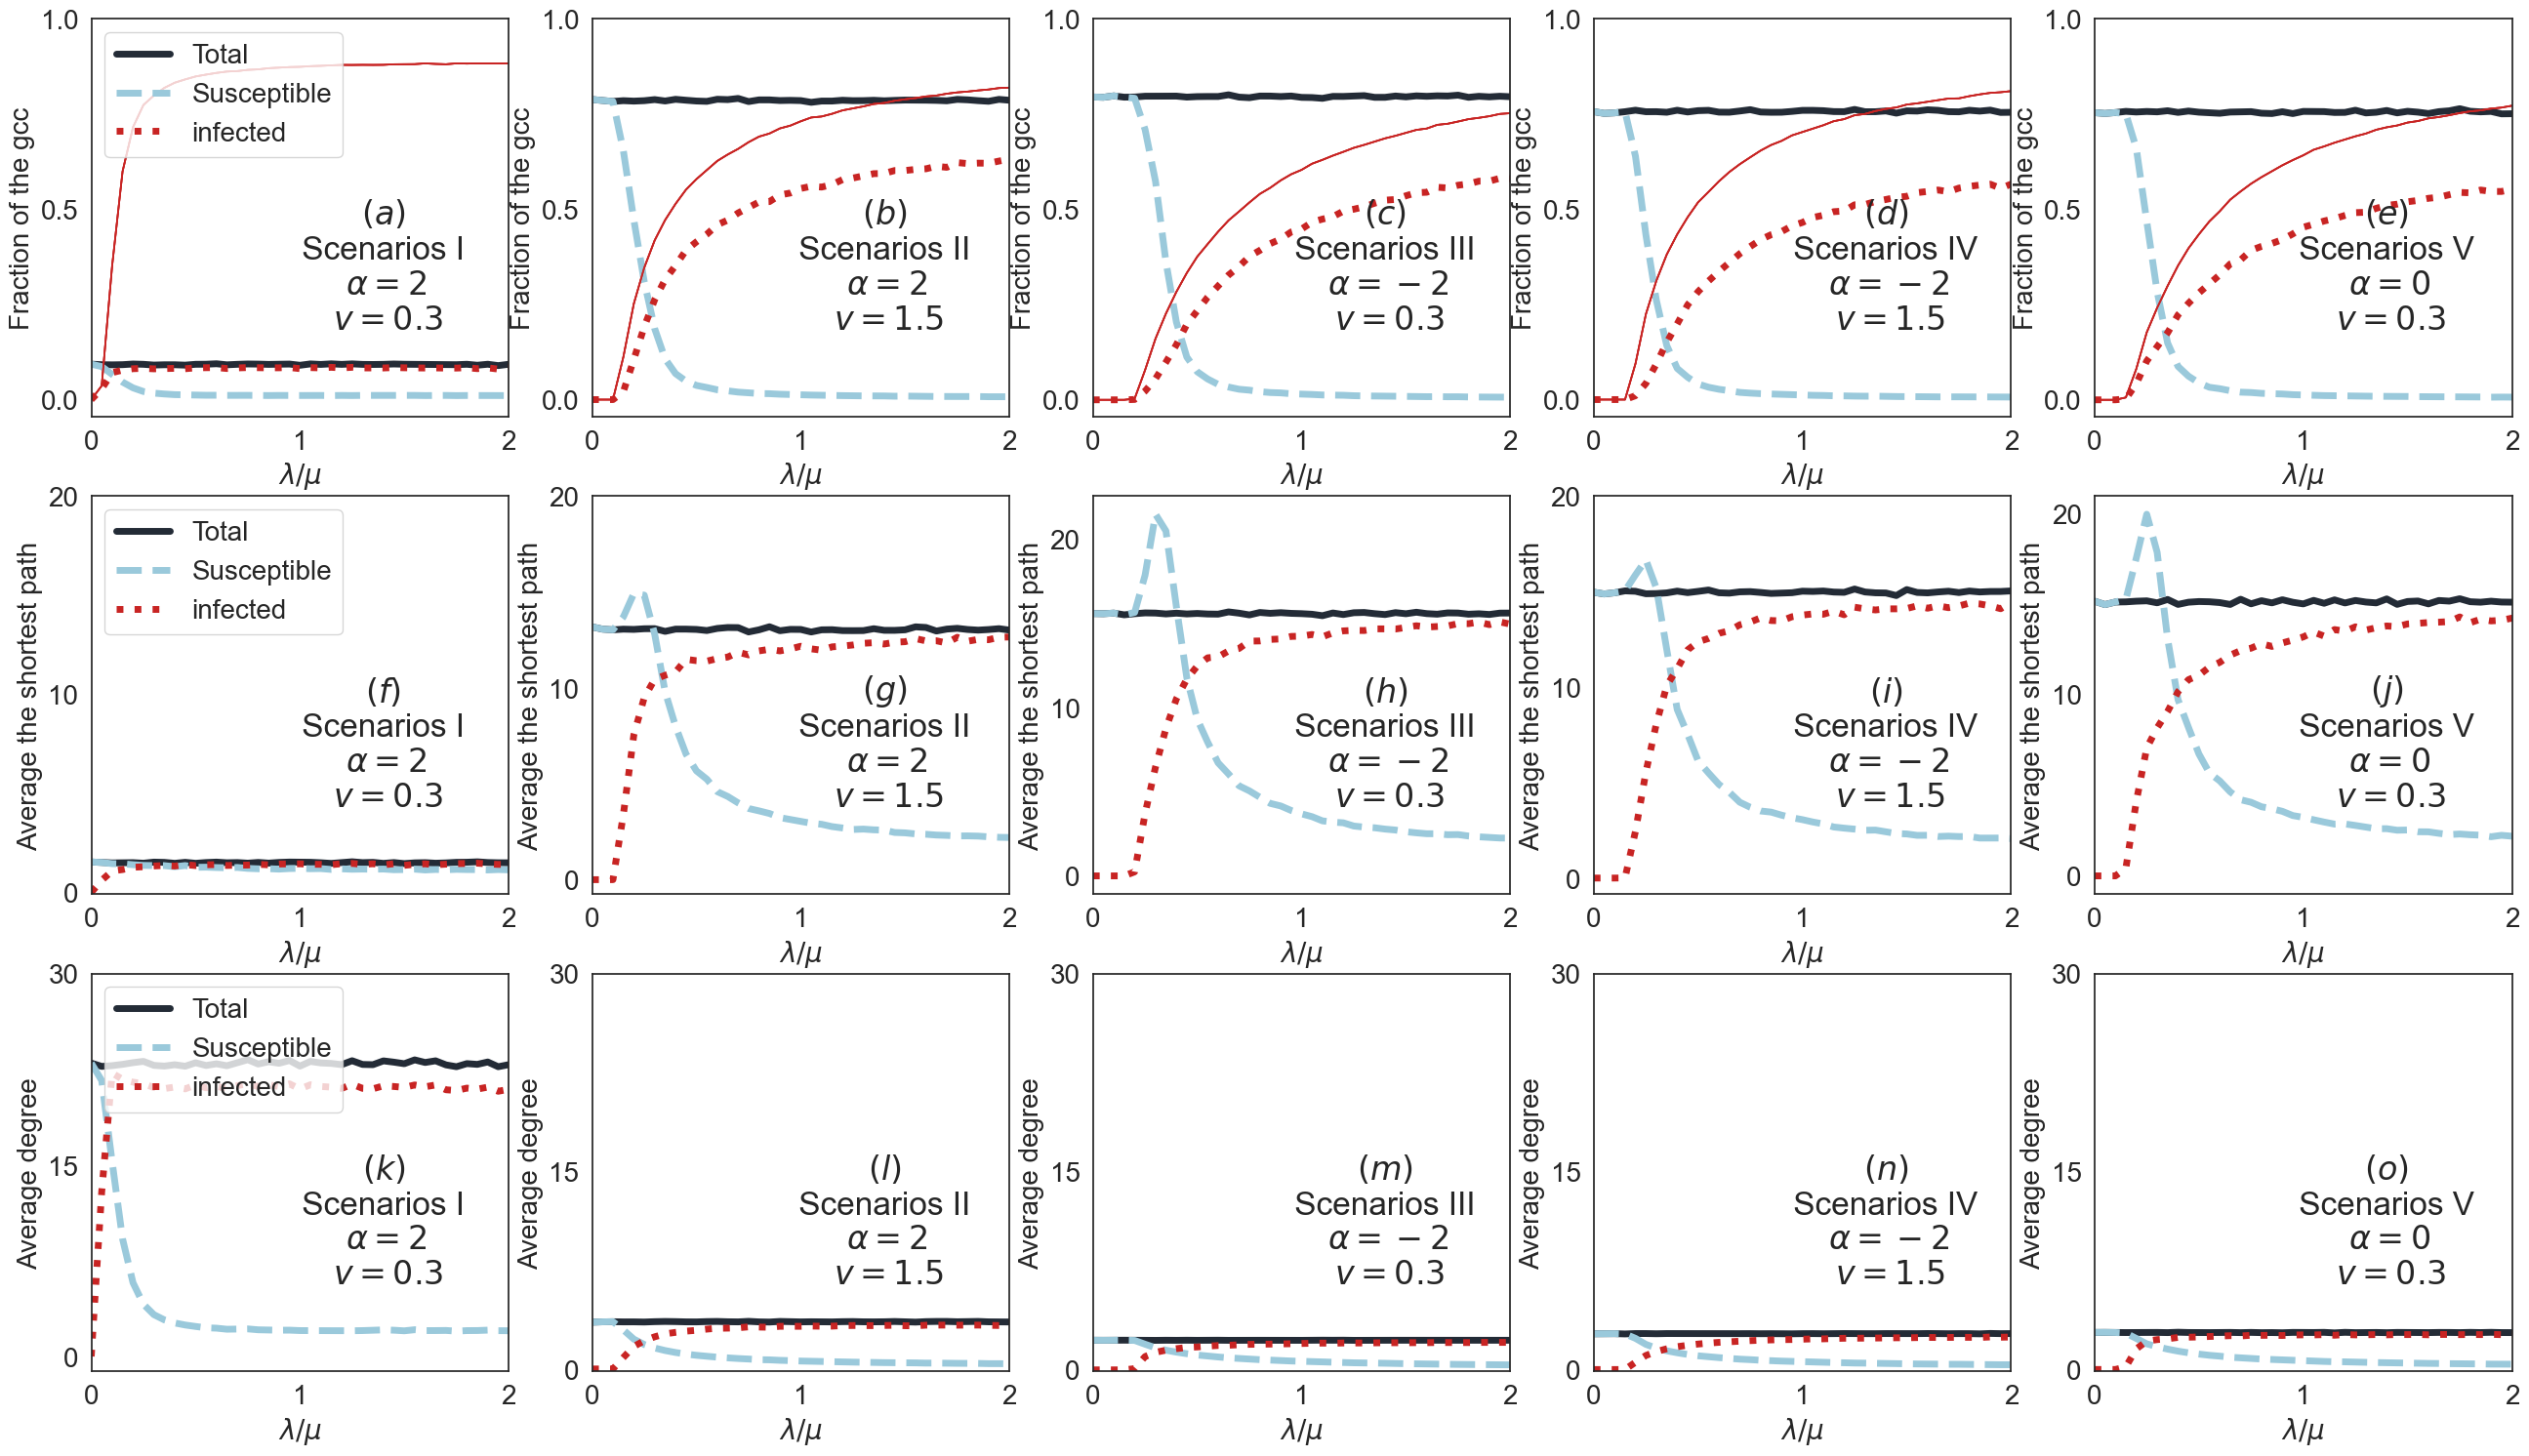

In [29]:
# Fig4 drawing
para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2,var3,var4,var5,var6,var7 ,var8,var9,var10,var11,var12,var13= 'alpha', 'mobility','threshold_','GCC','GSP','GIP',\
    'avd_G','avd_S','avd_I','k_G', 'k_S', 'k_I','Gc_G', 'Gc_S', 'Gc_I'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1
# 绘制画板
fig,axes = plt.subplots(3,5,figsize = (32,18),dpi = 100,sharex = False)
colormap = ['#232b36','#9ac9db','#c82423']
linestyle = ['-','--',':']
width = 5
# colormap = ['#232b36','#9c3129','#b4bfd0']
labelmap = ['Total','Susceptible','infected']


# 极大联通子图占比
for ax,data01,data09 in zip([axes[0,i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var2,var3,var4],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        ax.plot(data09[var1],data09[var]/1000,line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data01[var1],data01[var]/1000,'-',c = c,label = f'{label}')
        # ax.plot(data09[var1],data09[var]/1000,'s-',c = c,label = f'{var}-0.99')
        # ax.plot([0,1],[0.5,0.5],'--',c = '#5e616d')
        ax.plot(data09[var1],data09['prevalence'],'-',c = '#c82423',linewidth = width/4)
        ax.set_yticks([0.0,0.5,1.0])
        ax.set_xticks([0.0,1.0,2.0])
        ax.set_ylabel('Fraction of the gcc',fontsize = 20)

# 平均最短路径
for ax,data01,data09 in zip([axes[1,i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var5,var6,var7],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        # ax.plot(data01[var1],data01[var],'-',c = c,label = f'{label}')
        ax.plot(data09[var1],data09[var],line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data09[var1],data09[var],'s-',c = c,label = f'{var}-0.99')
        ax.set_yticks([0,10,20])
        ax.set_xticks([0.0,1.0,2.0])
        ax.set_ylabel('Average the shortest path',fontsize = 20)

# 平均度
for ax,data01,data09 in zip([axes[2,i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var8,var9,var10],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        # ax.plot(data01[var1],data01[var],'-',c = c,label = f'{label}')
        ax.plot(data09[var1],data09[var],line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data09[var1],data09[var],'s-',c = c,label = f'{var}-0.99')
        ax.set_yticks([0,15,30])
        ax.set_xticks([0.0,1.0,2.0])
        ax.set_ylabel('Average degree',fontsize = 20)


axes[0,0].legend(loc = 2,fontsize = 20)
axes[1,0].legend(loc = 2,fontsize = 20)
axes[2,0].legend(loc = 2,fontsize = 20)
# axes[3,0].legend(loc = 7,fontsize = 22)

for ax,title ,scene,[a,v]in zip(axes.ravel(),[f'$({i})$' for i in 'abcdefghijklmno'],["I","II","III","IV","V"]*3,para*5):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 20)
    ax.tick_params( labelsize=20 )
    ax.set_title(title+ (f'\n Scenarios {scene} \n $\\alpha = {a}$ \n $v = {v}$'),horizontalalignment='center',
                 loc = 'left',y = 0.2,x = 0.7,fontsize = 24)
    ax.set_xlim(0,2)
plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo\\004.eps',dpi = 300,format='eps',bbox_inches = 'tight')
plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo-red\\004.eps',dpi = 300,format='eps',bbox_inches = 'tight')
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\图片\\004.jpg',dpi = 300,bbox_inches = 'tight')



In [17]:
title + ('\n $\\alpha$')

'$(o)$\n $\\alpha$'

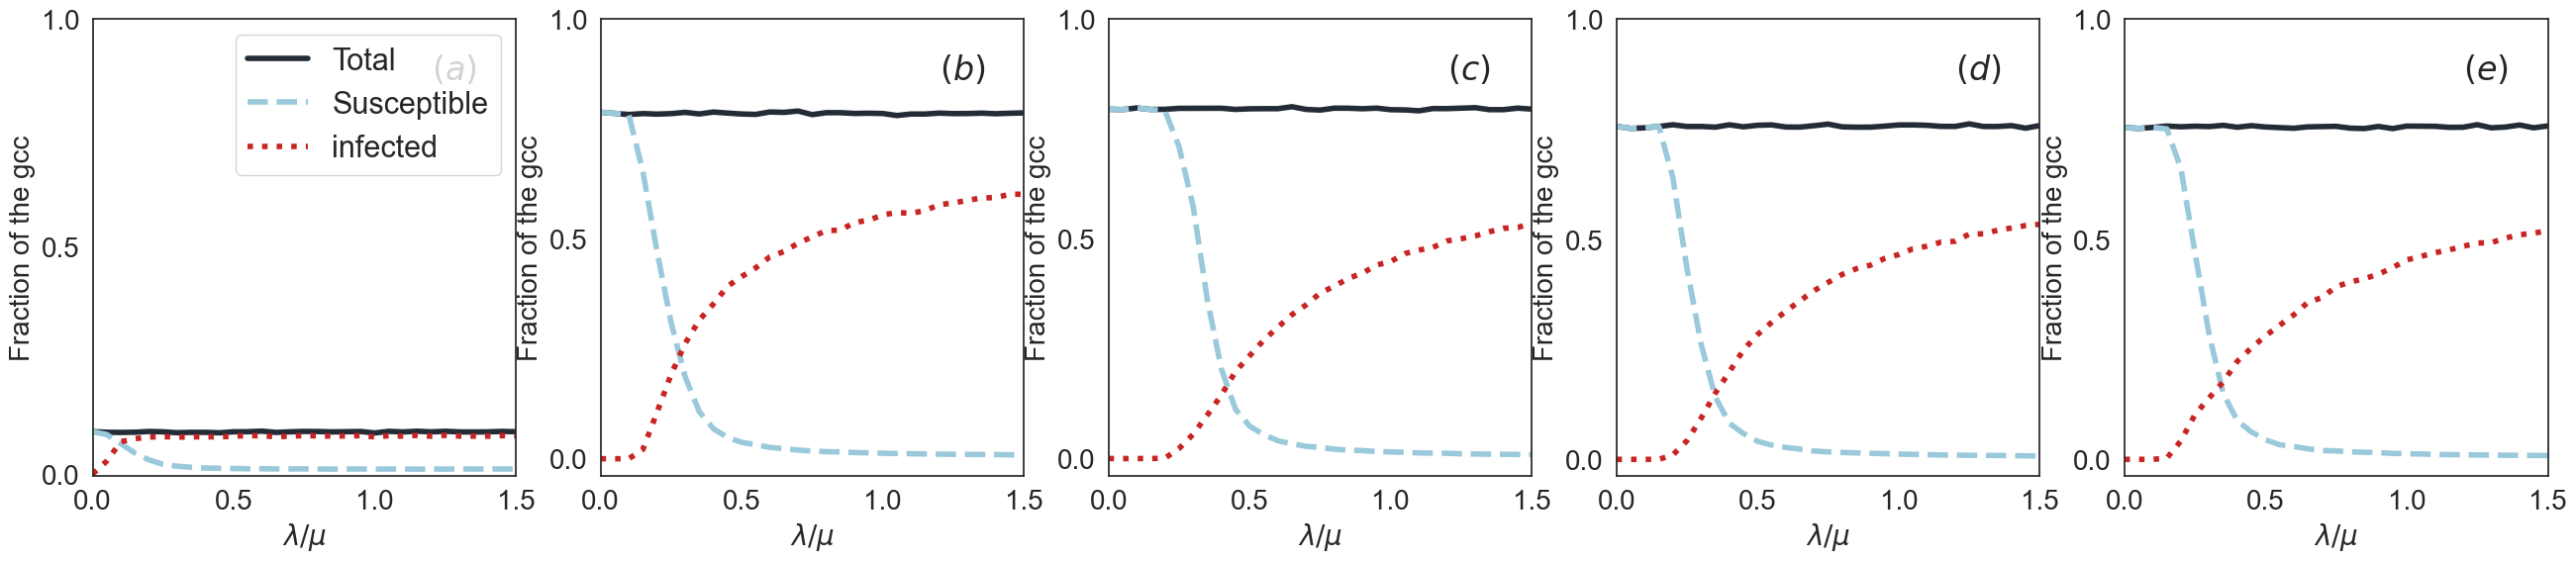

In [18]:
para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2,var3,var4,var5,var6,var7 ,var8,var9,var10,var11,var12,var13= 'alpha', 'mobility','threshold_','GCC','GSP','GIP',\
    'avd_G','avd_S','avd_I','k_G', 'k_S', 'k_I','Gc_G', 'Gc_S', 'Gc_I'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1
# 绘制画板
fig,axes = plt.subplots(1,5,figsize = (32,6),dpi = 100,sharey = False)
colormap = ['#232b36','#9ac9db','#c82423']
linestyle = ['-','--',':']
width = 4
# colormap = ['#232b36','#9c3129','#b4bfd0']
labelmap = ['Total','Susceptible','infected']


# 极大联通子图占比
for ax,data01,data09 in zip([axes[i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var2,var3,var4],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        ax.plot(data09[var1],data09[var]/1000,line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data01[var1],data01[var]/1000,'-',c = c,label = f'{label}')
        # ax.plot(data09[var1],data09[var]/1000,'s-',c = c,label = f'{var}-0.99')
        # ax.plot([0,1],[0.5,0.5],'--',c = '#5e616d')
        # ax.plot(data09[var1],data09['prevalence'],'-',c = '#c82423',linewidth = width/4)
        ax.set_yticks([0.0,0.5,1.0])
        ax.set_xticks([0.0,0.5,1.0,1.5])
        ax.set_ylabel('Fraction of the gcc',fontsize = 20)


axes[0].legend(loc = 0,fontsize = 22)
# axes[1,0].legend(loc = 2,fontsize = 22)
# axes[2,0].legend(loc = 7,fontsize = 22)
# axes[3,0].legend(loc = 7,fontsize = 22)

for ax,title in zip(axes.ravel(),[f'$({i})$' for i in 'abcde']):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 20)
    ax.tick_params( labelsize=20 )
    ax.set_title(title,loc = 'left',y = 0.85,x = 0.8,fontsize = 24)
    ax.set_xlim(0,1.5)
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\Latex\\004.eps',dpi = 200,format='eps',bbox_inches = 'tight')
# plt.savefig('C:\\Users\\15510\OneDrive - mwju2160\\桌面\\统计建模\\文档与资料\\图片\\4-1',dpi = 300,bbox_inches = 'tight')



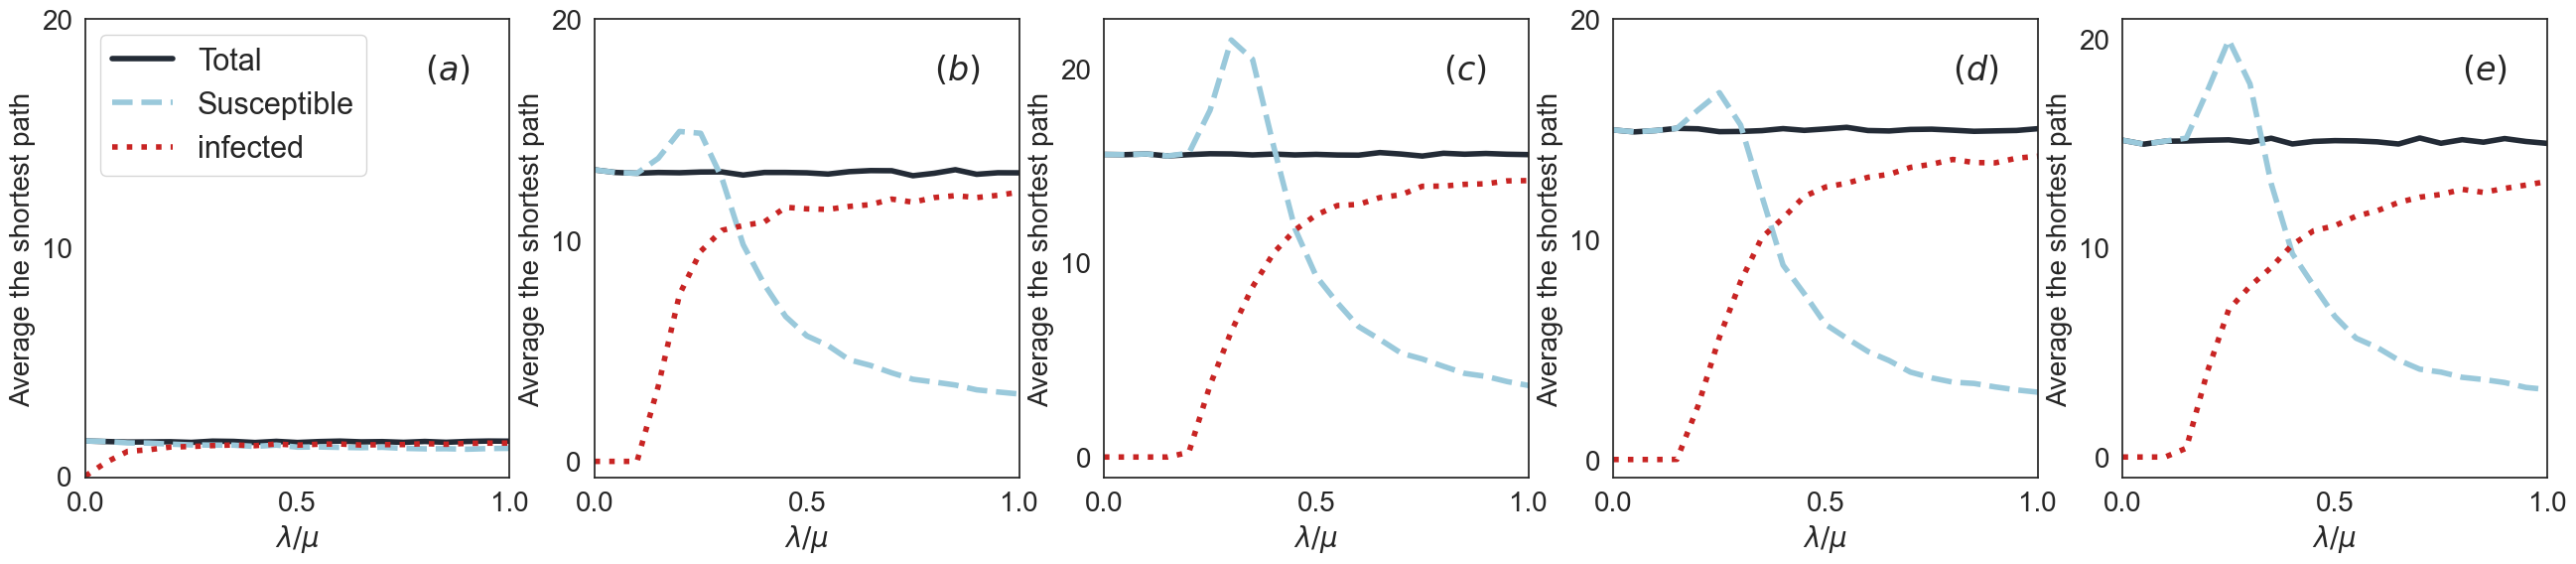

In [19]:
para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2,var3,var4,var5,var6,var7 ,var8,var9,var10,var11,var12,var13= 'alpha', 'mobility','threshold_','GCC','GSP','GIP',\
    'avd_G','avd_S','avd_I','k_G', 'k_S', 'k_I','Gc_G', 'Gc_S', 'Gc_I'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1
# 绘制画板
fig,axes = plt.subplots(1,5,figsize = (32,6),dpi = 100,sharey = False)
colormap = ['#232b36','#9ac9db','#c82423']
linestyle = ['-','--',':']
width = 4
# colormap = ['#232b36','#9c3129','#b4bfd0']
labelmap = ['Total','Susceptible','infected']



# 平均最短路径
for ax,data01,data09 in zip([axes[i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var5,var6,var7],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        # ax.plot(data01[var1],data01[var],'-',c = c,label = f'{label}')
        ax.plot(data09[var1],data09[var],line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data09[var1],data09[var],'s-',c = c,label = f'{var}-0.99')
        ax.set_yticks([0,10,20])
        ax.set_xticks([0.0,0.5,1.0])
        ax.set_ylabel('Average the shortest path',fontsize = 20)



axes[0].legend(loc = 2,fontsize = 22)

# axes[3,0].legend(loc = 7,fontsize = 22)

for ax,title in zip(axes.ravel(),[f'$({i})$' for i in 'abcde']):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 20)
    ax.tick_params( labelsize=20 )
    ax.set_title(title,loc = 'left',y = 0.85,x = 0.8,fontsize = 24)
    ax.set_xlim(0,1)
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\Latex\\004.eps',dpi = 200,format='eps',bbox_inches = 'tight')
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\图片\\004.jpg',dpi = 300,bbox_inches = 'tight')
# plt.savefig('C:\\Users\\15510\OneDrive - mwju2160\\桌面\\统计建模\\文档与资料\\图片\\4-2',dpi = 300,bbox_inches = 'tight')



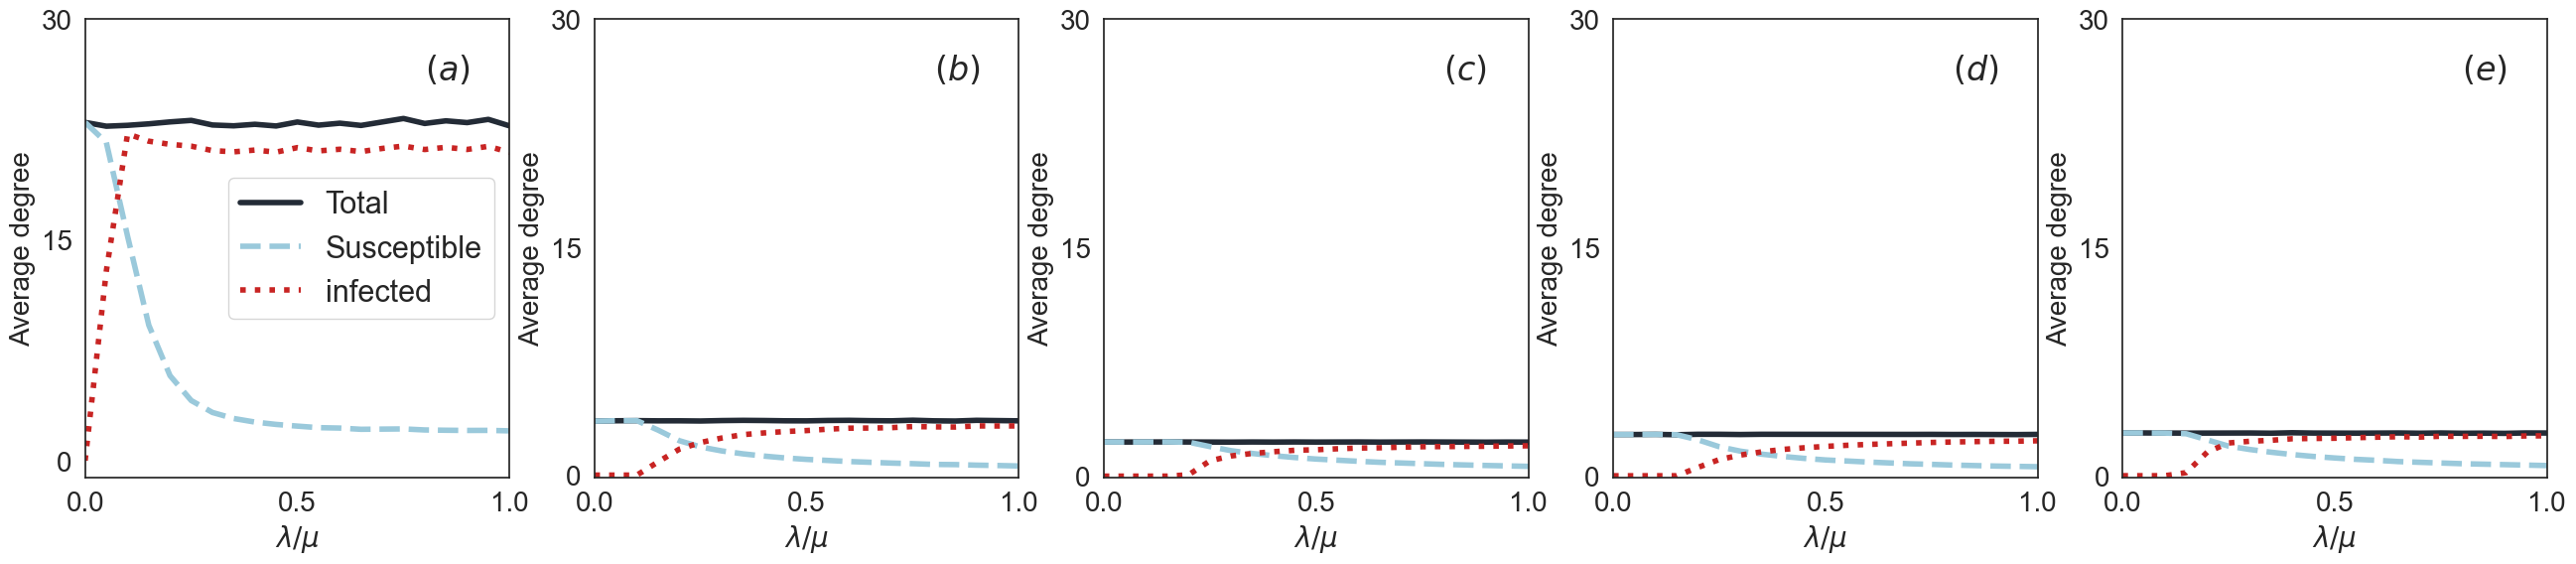

In [20]:
para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2,var3,var4,var5,var6,var7 ,var8,var9,var10,var11,var12,var13= 'alpha', 'mobility','threshold_','GCC','GSP','GIP',\
    'avd_G','avd_S','avd_I','k_G', 'k_S', 'k_I','Gc_G', 'Gc_S', 'Gc_I'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1
# 绘制画板
fig,axes = plt.subplots(1,5,figsize = (32,6),dpi = 100,sharey = False)
colormap = ['#232b36','#9ac9db','#c82423']
linestyle = ['-','--',':']
width = 4
# colormap = ['#232b36','#9c3129','#b4bfd0']
labelmap = ['Total','Susceptible','infected']


# 平均度
for ax,data01,data09 in zip([axes[i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var8,var9,var10],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        # ax.plot(data01[var1],data01[var],'-',c = c,label = f'{label}')
        ax.plot(data09[var1],data09[var],line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data09[var1],data09[var],'s-',c = c,label = f'{var}-0.99')
        ax.set_yticks([0,15,30])
        ax.set_xticks([0.0,0.5,1.0])
        ax.set_ylabel('Average degree',fontsize = 20)

axes[0].legend(loc = 0,fontsize = 22)

# axes[3,0].legend(loc = 7,fontsize = 22)

for ax,title in zip(axes.ravel(),[f'$({i})$' for i in 'abcdefghijklmnopqrst']):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 20)
    ax.tick_params( labelsize=20 )
    ax.set_title(title,loc = 'left',y = 0.85,x = 0.8,fontsize = 24)
    ax.set_xlim(0,1)
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\Latex\\004.eps',dpi = 200,format='eps',bbox_inches = 'tight')
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\图片\\004.jpg',dpi = 300,bbox_inches = 'tight')
# plt.savefig('C:\\Users\\15510\OneDrive - mwju2160\\桌面\\统计建模\\文档与资料\\图片\\4-3',dpi = 300,bbox_inches = 'tight')

